In [13]:
import re
import pickle
import warnings
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from xgboost import XGBClassifier
from datetime import date, datetime
from sklearn.impute import SimpleImputer
from IPython.core.display import display, HTML
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import plot_confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_rows', None)
pd.pandas.set_option('display.max_columns', None)
display(HTML('<style>.container{width : 100% ! important;}</style>'))

In [14]:
df = pd.read_csv('IPL 2nd Innings.csv')

In [15]:
df.head()

,match_id,year,date,city,venue,team1,team2,toss_winner,toss_decision,innings,batting_team,bowling_team,batsman,non_striker,bowler,overs,balls,ball_no,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,runs,wickets,runs_last_5_overs,wickets_last_5_overs,winner,result,result_margin,player_of_match,playoff,knockout,final,method,players,umpire1,umpire2,final_score,total_wickets,target_overs,target_runs,won
0,335982,2008,18-04-2008,Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,2,Royal Challengers Bangalore,Kolkata Knight Riders,R Dravid,W Jaffer,AB Dinda,0,1,1,1,0,1,0,0,NaN,NaN,NaN,NaN,1,0,1,0,Kolkata Knight Riders,runs,140.0,BB McCullum,0,0,0,NaN,"R Dravid, W Jaffer, V Kohli, JH Kallis, CL Whi...",Asad Rauf,RE Koertzen,82,10,20.0,223,0
1,335982,2008,18-04-2008,Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,R Dravid,AB Dinda,0,2,2,0,1,1,0,0,NaN,NaN,NaN,wides,2,0,2,0,Kolkata Knight Riders,runs,140.0,BB McCullum,0,0,0,NaN,"R Dravid, W Jaffer, V Kohli, JH Kallis, CL Whi...",Asad Rauf,RE Koertzen,82,10,20.0,223,0
2,335982,2008,18-04-2008,Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,R Dravid,AB Dinda,0,3,2,0,0,0,0,0,NaN,NaN,NaN,NaN,2,0,2,0,Kolkata Knight Riders,runs,140.0,BB McCullum,0,0,0,NaN,"R Dravid, W Jaffer, V Kohli, JH Kallis, CL Whi...",Asad Rauf,RE Koertzen,82,10,20.0,223,0
3,335982,2008,18-04-2008,Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,R Dravid,AB Dinda,0,4,3,1,0,1,0,0,NaN,NaN,NaN,NaN,3,0,3,0,Kolkata Knight Riders,runs,140.0,BB McCullum,0,0,0,NaN,"R Dravid, W Jaffer, V Kohli, JH Kallis, CL Whi...",Asad Rauf,RE Koertzen,82,10,20.0,223,0
4,335982,2008,18-04-2008,Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,2,Royal Challengers Bangalore,Kolkata Knight Riders,R Dravid,W Jaffer,AB Dinda,0,5,4,1,0,1,0,0,NaN,NaN,NaN,NaN,4,0,4,0,Kolkata Knight Riders,runs,140.0,BB McCullum,0,0,0,NaN,"R Dravid, W Jaffer, V Kohli, JH Kallis, CL Whi...",Asad Rauf,RE Koertzen,82,10,20.0,223,0


In [16]:
df.shape

(100217, 47)

In [17]:
df = df[df['overs'] > 4]

In [18]:
df.head()

,match_id,year,date,city,venue,team1,team2,toss_winner,toss_decision,innings,batting_team,bowling_team,batsman,non_striker,bowler,overs,balls,ball_no,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,runs,wickets,runs_last_5_overs,wickets_last_5_overs,winner,result,result_margin,player_of_match,playoff,knockout,final,method,players,umpire1,umpire2,final_score,total_wickets,target_overs,target_runs,won
32,335982,2008,18-04-2008,Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,CL White,AB Dinda,5,1,31,0,0,0,0,0,NaN,NaN,NaN,NaN,24,3,22,3,Kolkata Knight Riders,runs,140.0,BB McCullum,0,0,0,NaN,"R Dravid, W Jaffer, V Kohli, JH Kallis, CL Whi...",Asad Rauf,RE Koertzen,82,10,20.0,223,0
33,335982,2008,18-04-2008,Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,CL White,AB Dinda,5,2,32,0,0,0,0,1,71508.0,W Jaffer,RT Ponting,NaN,24,4,21,4,Kolkata Knight Riders,runs,140.0,BB McCullum,0,0,0,NaN,"R Dravid, W Jaffer, V Kohli, JH Kallis, CL Whi...",Asad Rauf,RE Koertzen,82,10,20.0,223,0
34,335982,2008,18-04-2008,Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,2,Royal Challengers Bangalore,Kolkata Knight Riders,MV Boucher,CL White,AB Dinda,5,3,33,0,0,0,0,0,NaN,NaN,NaN,NaN,24,4,20,4,Kolkata Knight Riders,runs,140.0,BB McCullum,0,0,0,NaN,"R Dravid, W Jaffer, V Kohli, JH Kallis, CL Whi...",Asad Rauf,RE Koertzen,82,10,20.0,223,0
35,335982,2008,18-04-2008,Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,2,Royal Challengers Bangalore,Kolkata Knight Riders,MV Boucher,CL White,AB Dinda,5,4,34,1,0,1,0,0,NaN,NaN,NaN,NaN,25,4,21,4,Kolkata Knight Riders,runs,140.0,BB McCullum,0,0,0,NaN,"R Dravid, W Jaffer, V Kohli, JH Kallis, CL Whi...",Asad Rauf,RE Koertzen,82,10,20.0,223,0
36,335982,2008,18-04-2008,Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,2,Royal Challengers Bangalore,Kolkata Knight Riders,CL White,MV Boucher,AB Dinda,5,5,35,1,0,1,0,0,NaN,NaN,NaN,NaN,26,4,22,4,Kolkata Knight Riders,runs,140.0,BB McCullum,0,0,0,NaN,"R Dravid, W Jaffer, V Kohli, JH Kallis, CL Whi...",Asad Rauf,RE Koertzen,82,10,20.0,223,0


In [19]:
df.shape

(72949, 47)

In [20]:
df = df[['year', 'venue', 'toss_decision', 'batting_team', 'bowling_team', 'overs', 'ball_no', 'runs', 'wickets', 'runs_last_5_overs', 
         'wickets_last_5_overs', 'playoff', 'knockout', 'final', 'final_score']]

In [21]:
dummy = ['venue', 'toss_decision', 'batting_team', 'bowling_team']
df_dummy = pd.get_dummies(df[dummy], prefix_sep = '_', drop_first = False)
df = df.drop(dummy, axis = 1)
df = pd.concat([df, df_dummy], axis = 1)

In [22]:
columns = []
for i in df.columns:
    i = re.sub('\s', '_', i)
    i = re.sub('\.', '', i)
    i = re.sub('\,', '', i)
    i = re.sub('\-', '_', i)
    columns.append(i)
df.columns = columns

In [23]:
df.columns

Index(['year', 'overs', 'ball_no', 'runs', 'wickets', 'runs_last_5_overs',
       'wickets_last_5_overs', 'playoff', 'knockout', 'final', 'final_score',
       'venue_Arun_Jaitley_Stadium', 'venue_Barabati_Stadium',
       'venue_Brabourne_Stadium', 'venue_Buffalo_Park',
       'venue_De_Beers_Diamond_Oval', 'venue_Dr_DY_Patil_Sports_Academy',
       'venue_Dr_YS_Rajasekhara_Reddy_ACA_VDCA_Cricket_Stadium',
       'venue_Dubai_International_Cricket_Stadium', 'venue_Eden_Gardens',
       'venue_Green_Park',
       'venue_Himachal_Pradesh_Cricket_Association_Stadium',
       'venue_Holkar_Cricket_Stadium',
       'venue_JSCA_International_Stadium_Complex', 'venue_Kingsmead',
       'venue_M_Chinnaswamy_Stadium', 'venue_MA_Chidambaram_Stadium',
       'venue_Maharashtra_Cricket_Association_Stadium',
       'venue_Narendra_Modi_Stadium', 'venue_Nehru_Stadium',
       'venue_New_Wanderers_Stadium', 'venue_Newlands',
       'venue_OUTsurance_Oval',
       'venue_Punjab_Cricket_Association_IS

In [24]:
df = df[['year', 'batting_team_Chennai_Super_Kings', 'batting_team_Deccan_Chargers', 'batting_team_Delhi_Capitals', 'batting_team_Gujarat_Lions', 
         'batting_team_Kochi_Tuskers_Kerala', 'batting_team_Kolkata_Knight_Riders', 'batting_team_Mumbai_Indians', 'batting_team_Pune_Warriors', 
         'batting_team_Punjab_Kings', 'batting_team_Rajasthan_Royals', 'batting_team_Rising_Pune_Supergiant', 
         'batting_team_Royal_Challengers_Bangalore', 'batting_team_Sunrisers_Hyderabad', 'bowling_team_Chennai_Super_Kings', 
         'bowling_team_Deccan_Chargers', 'bowling_team_Delhi_Capitals', 'bowling_team_Gujarat_Lions', 'bowling_team_Kochi_Tuskers_Kerala', 
         'bowling_team_Kolkata_Knight_Riders', 'bowling_team_Mumbai_Indians', 'bowling_team_Pune_Warriors', 'bowling_team_Punjab_Kings', 
         'bowling_team_Rajasthan_Royals', 'bowling_team_Rising_Pune_Supergiant', 'bowling_team_Royal_Challengers_Bangalore', 
         'bowling_team_Sunrisers_Hyderabad', 'toss_decision_bat', 'toss_decision_field', 'venue_Arun_Jaitley_Stadium', 
         'venue_Barabati_Stadium', 'venue_Brabourne_Stadium', 'venue_Buffalo_Park', 'venue_De_Beers_Diamond_Oval', 
         'venue_Dr_DY_Patil_Sports_Academy', 'venue_Dr_YS_Rajasekhara_Reddy_ACA_VDCA_Cricket_Stadium', 
         'venue_Dubai_International_Cricket_Stadium', 'venue_Eden_Gardens', 'venue_Green_Park', 
         'venue_Himachal_Pradesh_Cricket_Association_Stadium', 'venue_Holkar_Cricket_Stadium', 
         'venue_JSCA_International_Stadium_Complex', 'venue_Kingsmead', 'venue_M_Chinnaswamy_Stadium', 'venue_MA_Chidambaram_Stadium', 
         'venue_Maharashtra_Cricket_Association_Stadium', 'venue_Narendra_Modi_Stadium', 'venue_Nehru_Stadium', 'venue_New_Wanderers_Stadium', 
         'venue_Newlands', 'venue_OUTsurance_Oval', 'venue_Punjab_Cricket_Association_IS_Bindra_Stadium', 
         'venue_Rajiv_Gandhi_International_Stadium', 'venue_Saurashtra_Cricket_Association_Stadium', 'venue_Sawai_Mansingh_Stadium', 
         'venue_Shaheed_Veer_Narayan_Singh_International_Stadium', 'venue_Sharjah_Cricket_Stadium', 'venue_Sheikh_Zayed_Stadium', 
         'venue_St_George\'s_Park', 'venue_SuperSport_Park', 'venue_Vidarbha_Cricket_Association_Stadium', 'venue_Wankhede_Stadium', 'overs', 
         'ball_no', 'runs', 'wickets', 'runs_last_5_overs', 'wickets_last_5_overs', 'playoff', 'knockout', 'final', 'final_score']]

In [25]:
df.shape

(72949, 72)

In [26]:
train = df[df['year'] <= 2019]
test = df[df['year'] >= 2020]

In [27]:
train.year.unique(), test.year.unique()

(array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
        2019], dtype=int64),
 array([2020, 2021], dtype=int64))

In [28]:
X_train = pd.DataFrame(train.drop(['year', 'final_score'], axis = 1), columns = train.drop(['year', 'final_score'], axis = 1).columns)
X_test = pd.DataFrame(test.drop(['year', 'final_score'], axis = 1), columns = test.drop(['year', 'final_score'], axis = 1).columns)
y_train = train['final_score']
y_test = test['final_score']

In [29]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((62694, 70), (10255, 70), (62694,), (10255,))

In [30]:
lr = LinearRegression()
lr.fit(X_train, y_train)

NameError: name 'LinearRegression' is not defined

In [19]:
y_train_pred_lr = lr.predict(X_train)
y_test_pred_lr = lr.predict(X_test)
print('Linear Regression:')
print('-' * 100)
print('Train r2_score: ', r2_score(y_train, y_train_pred_lr))
print('Test r2_score: ', r2_score(y_test, y_test_pred_lr))
print('-' * 100)
print('Train RMSE: ', np.sqrt(mean_squared_error(y_train, y_train_pred_lr)))
print('Test RMSE: ', np.sqrt(mean_squared_error(y_test, y_test_pred_lr)))
print('-' * 100)
print('Train MAE: ', mean_absolute_error(y_train, y_train_pred_lr))
print('Test MAE: ', mean_absolute_error(y_test, y_test_pred_lr))
data_lr = test
data_lr['predicted_score'] = y_test_pred_lr
sns.distplot(data_lr['final_score'] - data_lr['predicted_score'])
sns.distplot(abs(data_lr['final_score'] - data_lr['predicted_score']))

Linear Regression:
----------------------------------------------------------------------------------------------------
Train accuracy_score:  0.08010335917312661
Test accuracy_score:  0.00955631399317406
----------------------------------------------------------------------------------------------------


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [20]:
la = Lasso()
possible_parameter_values = {'alpha' : [float(x)/1000 for x in np.arange(start = 1, stop = 1001, step = 1)]}
la_rscv = RandomizedSearchCV(estimator = la, param_distributions = possible_parameter_values, cv = 10, scoring = 'neg_mean_absolute_error', 
                             verbose = 2, n_jobs = 1)
la_rscv.fit(X_train, y_train)
la_rscv.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END ........................................alpha=0.627; total time=   0.7s
[CV] END ........................................alpha=0.627; total time=   0.6s
[CV] END ........................................alpha=0.627; total time=   0.7s
[CV] END ........................................alpha=0.627; total time=   0.5s
[CV] END ........................................alpha=0.627; total time=   0.5s
[CV] END ........................................alpha=0.627; total time=   0.5s
[CV] END ........................................alpha=0.627; total time=   0.5s
[CV] END ........................................alpha=0.627; total time=   0.5s
[CV] END ........................................alpha=0.627; total time=   0.5s
[CV] END ........................................alpha=0.627; total time=   0.4s
[CV] END .........................................alpha=0.23; total time=   0.9s
[CV] END .....................................

{'alpha': 0.23}

Lasso Regression:
----------------------------------------------------------------------------------------------------
Train r2_score:  0.6296678694868545
Test r2_score:  0.6584517225266941
----------------------------------------------------------------------------------------------------
Train RMSE:  17.932675025705766
Test RMSE:  17.702902891584586
----------------------------------------------------------------------------------------------------
Train MAE:  13.236678031847266
Test MAE:  13.88891464802978


<AxesSubplot:ylabel='Density'>

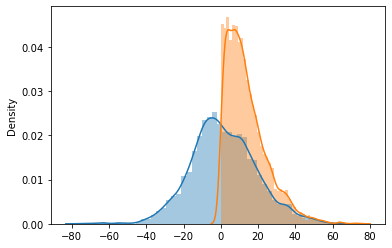

In [21]:
y_train_pred_la = la_rscv.predict(X_train)
y_test_pred_la = la_rscv.predict(X_test)
print('Lasso Regression:')
print('-' * 100)
print('Train r2_score: ', r2_score(y_train, y_train_pred_la))
print('Test r2_score: ', r2_score(y_test, y_test_pred_la))
print('-' * 100)
print('Train RMSE: ', np.sqrt(mean_squared_error(y_train, y_train_pred_la)))
print('Test RMSE: ', np.sqrt(mean_squared_error(y_test, y_test_pred_la)))
print('-' * 100)
print('Train MAE: ', mean_absolute_error(y_train, y_train_pred_la))
print('Test MAE: ', mean_absolute_error(y_test, y_test_pred_la))
data_la = test
data_la['predicted_score'] = y_test_pred_la
sns.distplot(data_la['final_score'] - data_la['predicted_score'])
sns.distplot(abs(data_la['final_score'] - data_la['predicted_score']))

In [22]:
ri = Ridge()
possible_parameter_values = {'alpha' : [float(x)/1000 for x in np.arange(start = 1, stop = 1001, step = 1)]}
ri_rscv = RandomizedSearchCV(estimator = ri, param_distributions = possible_parameter_values, cv = 10, scoring = 'neg_mean_absolute_error', 
                             verbose = 2, n_jobs = 1)
ri_rscv.fit(X_train, y_train)
ri_rscv.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END ........................................alpha=0.312; total time=   0.2s
[CV] END ........................................alpha=0.312; total time=   0.1s
[CV] END ........................................alpha=0.312; total time=   0.2s
[CV] END ........................................alpha=0.312; total time=   0.2s
[CV] END ........................................alpha=0.312; total time=   0.2s
[CV] END ........................................alpha=0.312; total time=   0.1s
[CV] END ........................................alpha=0.312; total time=   0.2s
[CV] END ........................................alpha=0.312; total time=   0.1s
[CV] END ........................................alpha=0.312; total time=   0.1s
[CV] END ........................................alpha=0.312; total time=   0.1s
[CV] END ........................................alpha=0.614; total time=   0.1s
[CV] END .....................................

{'alpha': 0.898}

Ridge Regression:
----------------------------------------------------------------------------------------------------
Train r2_score:  0.6482904609654013
Test r2_score:  0.6218437724352945
----------------------------------------------------------------------------------------------------
Train RMSE:  17.475976625839156
Test RMSE:  18.627478284916698
----------------------------------------------------------------------------------------------------
Train MAE:  12.994792450799114
Test MAE:  14.554589557420261


<AxesSubplot:ylabel='Density'>

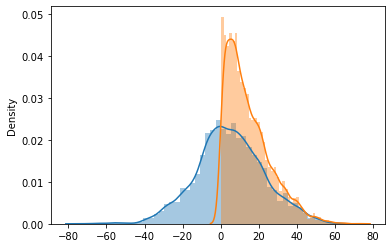

In [23]:
y_train_pred_ri = ri_rscv.predict(X_train)
y_test_pred_ri = ri_rscv.predict(X_test)
print('Ridge Regression:')
print('-' * 100)
print('Train r2_score: ', r2_score(y_train, y_train_pred_ri))
print('Test r2_score: ', r2_score(y_test, y_test_pred_ri))
print('-' * 100)
print('Train RMSE: ', np.sqrt(mean_squared_error(y_train, y_train_pred_ri)))
print('Test RMSE: ', np.sqrt(mean_squared_error(y_test, y_test_pred_ri)))
print('-' * 100)
print('Train MAE: ', mean_absolute_error(y_train, y_train_pred_ri))
print('Test MAE: ', mean_absolute_error(y_test, y_test_pred_ri))
data_ri = test
data_ri['predicted_score'] = y_test_pred_ri
sns.distplot(data_ri['final_score'] - data_ri['predicted_score'])
sns.distplot(abs(data_ri['final_score'] - data_ri['predicted_score']))

In [ ]:
abc = AdaBoostClassifier()
possible_parameter_values = {'n_estimators' : [int(x) for x in np.arange(start = 50, stop = 1001, step = 50)],
                             'learning_rate' : [float(x)/1000 for x in np.arange(start = 1, stop = 1001, step = 1)]}
abr_rscv = RandomizedSearchCV(estimator = abc, param_distributions = possible_parameter_values, cv = 10, scoring = 'neg_mean_absolute_error', 
                              verbose = 2, n_jobs = 1)
abr_rscv.fit(X_train, y_train)
abr_rscv.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\Users\asset\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


[CV] END ...............learning_rate=0.88, n_estimators=850; total time= 3.4min
[CV] END ...............learning_rate=0.88, n_estimators=850; total time= 3.4min


Ada Boost Regression:
----------------------------------------------------------------------------------------------------
Train r2_score:  0.4909095506149216
Test r2_score:  0.4748697015891684
----------------------------------------------------------------------------------------------------
Train RMSE:  21.025525364862272
Test RMSE:  21.950882022683775
----------------------------------------------------------------------------------------------------
Train MAE:  16.45341290738583
Test MAE:  17.61940572490252


<AxesSubplot:ylabel='Density'>

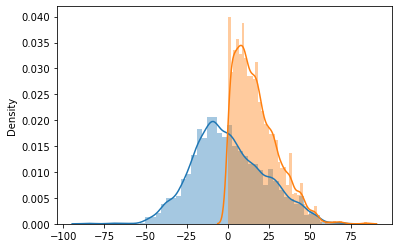

In [25]:
y_train_pred_abr = abr_rscv.predict(X_train)
y_test_pred_abr = abr_rscv.predict(X_test)
print('Ada Boost Regression:')
print('-' * 100)
print('Train r2_score: ', r2_score(y_train, y_train_pred_abr))
print('Test r2_score: ', r2_score(y_test, y_test_pred_abr))
print('-' * 100)
print('Train RMSE: ', np.sqrt(mean_squared_error(y_train, y_train_pred_abr)))
print('Test RMSE: ', np.sqrt(mean_squared_error(y_test, y_test_pred_abr)))
print('-' * 100)
print('Train MAE: ', mean_absolute_error(y_train, y_train_pred_abr))
print('Test MAE: ', mean_absolute_error(y_test, y_test_pred_abr))
data_abr = test
data_abr['predicted_score'] = y_test_pred_abr
sns.distplot(data_abr['final_score'] - data_abr['predicted_score'])
sns.distplot(abs(data_abr['final_score'] - data_abr['predicted_score']))

In [26]:
knr = KNeighborsRegressor()
possible_parameter_values = {'n_neighbors' : [int(x) for x in np.arange(start = 1, stop = 11, step = 1)],
                             'weights' : ['uniform', 'distance']}
knr_rscv = RandomizedSearchCV(estimator = knr, param_distributions = possible_parameter_values, cv = 10, scoring = 'neg_mean_absolute_error', 
                              verbose = 2, n_jobs = 1)
knr_rscv.fit(X_train, y_train)
knr_rscv.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END .....................n_neighbors=2, weights=uniform; total time=   5.5s
[CV] END .....................n_neighbors=2, weights=uniform; total time=   5.4s
[CV] END .....................n_neighbors=2, weights=uniform; total time=   5.5s
[CV] END .....................n_neighbors=2, weights=uniform; total time=   5.7s
[CV] END .....................n_neighbors=2, weights=uniform; total time=   5.8s
[CV] END .....................n_neighbors=2, weights=uniform; total time=   5.8s
[CV] END .....................n_neighbors=2, weights=uniform; total time=   5.8s
[CV] END .....................n_neighbors=2, weights=uniform; total time=   5.6s
[CV] END .....................n_neighbors=2, weights=uniform; total time=   5.7s
[CV] END .....................n_neighbors=2, weights=uniform; total time=   5.7s
[CV] END .....................n_neighbors=7, weights=uniform; total time=   6.2s
[CV] END .....................n_neighbors=7, w

{'weights': 'uniform', 'n_neighbors': 10}

K Neighbors Regression:
----------------------------------------------------------------------------------------------------
Train r2_score:  0.7940011058114101
Test r2_score:  0.6255758777420586
----------------------------------------------------------------------------------------------------
Train RMSE:  13.374631527916426
Test RMSE:  18.53533106717677
----------------------------------------------------------------------------------------------------
Train MAE:  9.488389215147395
Test MAE:  13.905602140945584


<AxesSubplot:ylabel='Density'>

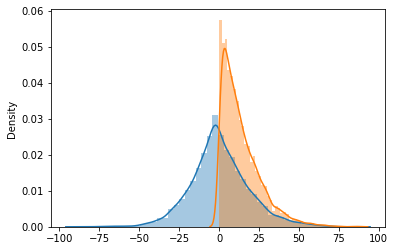

In [27]:
y_train_pred_knr = knr_rscv.predict(X_train)
y_test_pred_knr = knr_rscv.predict(X_test)
print('K Neighbors Regression:')
print('-' * 100)
print('Train r2_score: ', r2_score(y_train, y_train_pred_knr))
print('Test r2_score: ', r2_score(y_test, y_test_pred_knr))
print('-' * 100)
print('Train RMSE: ', np.sqrt(mean_squared_error(y_train, y_train_pred_knr)))
print('Test RMSE: ', np.sqrt(mean_squared_error(y_test, y_test_pred_knr)))
print('-' * 100)
print('Train MAE: ', mean_absolute_error(y_train, y_train_pred_knr))
print('Test MAE: ', mean_absolute_error(y_test, y_test_pred_knr))
data_knr = test
data_knr['predicted_score'] = y_test_pred_knr
sns.distplot(data_knr['final_score'] - data_knr['predicted_score'])
sns.distplot(abs(data_knr['final_score'] - data_knr['predicted_score']))